# Neural Networks

This notebook describes a neural network for binary classification. The neural network fitting algorithm finds the weights which are used to map the data into successive layers to calculate a probability for each observation.

$n$: number of observations.

$k$: number of variables.

$H$: number of hidden layers.

$X$: $n$ by $k$ data matrix.

$y$: $n$ by 1 array of binary outputs.

$\hat{y}$: $n$ by 1 array of probability prediction of the neural networks.

$h$: index for the hidden layer
$m$: number of nodes in each hidden layer, excluding the bias term.

$a^{(h)}$: $h^{th}$ hidden layer, an $n$ by $m + 1$ matrix, including the bias term. 

$\theta^{(1)}:$ Initial weights, a $k$ by $m + 1$ matrix that maps $X$ to the first hidden layer. The $(m + 1)^{st}$ term is the bias term.

$\theta^{(h)}:$ The $h^{th}$ layer's weigths, an $m + 1$ by $m$ matrix.

$\theta^{(H)}:$ The last layer's weigths, an $m + 1$ by $1$ matrix that maps the last layer $a^{(H)}$ to $\hat{y}$.

$g()$: Activation function used to map the previous layer to the next layer. For the binary classification task, the logistic function is used:

$$g(a^{(h-1)}\theta^{(h-1)}) = \frac{1}{1 + e^{-a^{(h-1)}\theta^{(h-1)}}} = a^{(h)}$$

$J(\theta)$: The cost function the neural network fitting algorithm tries to minimize. The cost function is the log-likelihood of the logistic function.

Starting with the Likelihood function for a binomial variable, with probability $p$:

$L(p;x) = \prod_{i=1}^{i=n} p^{y_i}(1-p)^{1-y_i}$

$ll(p;x) = \sum_{i=1}^{i=n} y_iln(p) + (1-y_i)ln(1-p)$

Substitute the logistic function for $p$.

$ll(p;x)=\sum_{i=1}^{i=n} y_iln(\frac{1}{1 + e^{-a^{(H)}\theta^{(H)}}}) + (1-y_i)ln(1-\frac{1}{1 + e^{-a^{(H)}\theta^{(H)}}})$

$\sum_{i=1}^{i=n} -y_iln(1 + e^{-a^{(H)}\theta^{(H)}}) + (1-y_i)[{-a^{(H)}\theta^{(H)}}-ln({1 + e^{-a^{(H)}\theta^{(H)}}})]$

$\sum_{i=1}^{i=n} -a^{(H)}\theta^{(H)}(1-y_i)-ln(1+e^{-a^{(H)}\theta^{(H)}})$

Fitting a logistic regression maximizes this log-likelihood, which is equivalent to minimizing the negative of the log-likelihood. The cost function then is the average of the negative of the log-likelihood function over all observations:

$J(\theta)=\frac{1}{n}\sum_{i=1}^{i=n} a^{(H)}\theta^{(H)}(1-y_i)+ln(1+e^{-a^{(H)}\theta^{(H)}})$

Here is the outline of the algorithm to minimize the cost function:

1) Randomy initialize weights.

2) Calculate the predicted probabilities using the weigths. 

3) Calculate the derivative of the cost function with respect to the weights.

4) Update the weights.

5) Repeat 2 to 4 until the error function does not improve more than a threshold, or until the preset number of iterations are completed. 




The derivative of the cost function with respect to the last set of weights (called here 'output weights') are calculated as follows: 

$\frac{dJ(\theta)}{d\theta^{(H)}}=\frac{1}{n}\sum_{i=1}^{i=n}a^{(H)}(1-y_i)-\frac{a^{(H)}e^{-a^{(H)}\theta^{(H)}}}{1+e^{-a^{(H)}\theta^{(H)}}}$

$\frac{dJ(\theta)}{d\theta^{(H)}}=\frac{1}{n}\sum_{i=1}^{i=n}a^{(H)}(1-y_i)-a^{(H)}(1-\hat{p_i})$

$\frac{dJ(\theta)}{d\theta^{(H)}}=\frac{1}{n}\sum_{i=1}^{i=n}a^{(H)}(\hat{p_i}-y_i)$


The derivative of the cost function with respect to earlier weights are calculated as follows. Starting from the cost function:

$J(\theta)=\frac{1}{n}\sum_{i=1}^{i=n} a^{(H)}\theta^{(H)}(1-y_i)+ln(1+e^{-a^{(H)}\theta^{(H)}})$

$J(\theta)=\frac{1}{n}\sum_{i=1}^{i=n} g(a^{(H-1)}\theta^{(H-1)})\theta^{(H)}(1-y_i)+ln(1+e^{-g(a^{(H-1)}\theta^{(H-1)})\theta^{(H)}})$

$\frac{dJ(\theta}{d\theta^{H-1}}=\frac{1}{n}\sum_{i=1}^{i=n} \frac{dg(a^{(H-1)}\theta^{(H-1)})}{d\theta^{(H-1)}}\theta^{(H)}(1-y_i)-\frac{e^{-g(a^{(H-1)}\theta^{(H-1)})\theta^{(H)}}\theta^{(H)}a^{(H-1)}}{1+e^{-g(a^{(H-1)}\theta^{(H-1)})\theta^{(H)}}}\frac{dg(a^{(H-1)}\theta^{(H-1)})}{d\theta^{(H-1)}}$

$\frac{dJ(\theta}{d\theta^{H-1}}=\frac{1}{n}\sum_{i=1}^{i=n}\frac{dg(a^{(H-1)}\theta^{(H-1)})}{d\theta^{(H-1)}}\theta^{H}a^{H-1}(\hat{p}-y_i)$

We can replace the derivative term with: 

$\frac{dg(a^{(H-1)}\theta^{(H-1)})}{d\theta^{(H-1)}}=a^{H-1}(1-a^{H-1})$

This comes from:

$\frac{dg(a^{(H-1)}\theta^{(H-1)})}{d\theta^{(H-1)}}=$

$\frac{d(\frac{1}{1+e^{-a^{(H-1)}\theta^{(H-1)}}})}{d\theta^{(H-1)}}=(1+e^{-a^{(H-1)}\theta^{(H-1)}})^{-2}e^{-a^{(H-1)}\theta^{(H-1)}}$

$\frac{1}{1+e^{-a^{(H-1)}\theta^{(H-1)}}}(1-\frac{1}{1+e^{-a^{(H-1)}\theta^{(H-1)}}})=a^{H-1}(1-a^{(H-1)})$

Calculating the derivative of the cost function with respect to each weight is called backpropagation. After the derivatives of the cost function with respect to each weight are calculated, they can be adjusted with a learning rate and the weights can be updated:

$\theta^{(h)}=\theta^{(h)}+\lambda\frac{dJ(\theta^{(h)})}{\theta^{(h)}}$



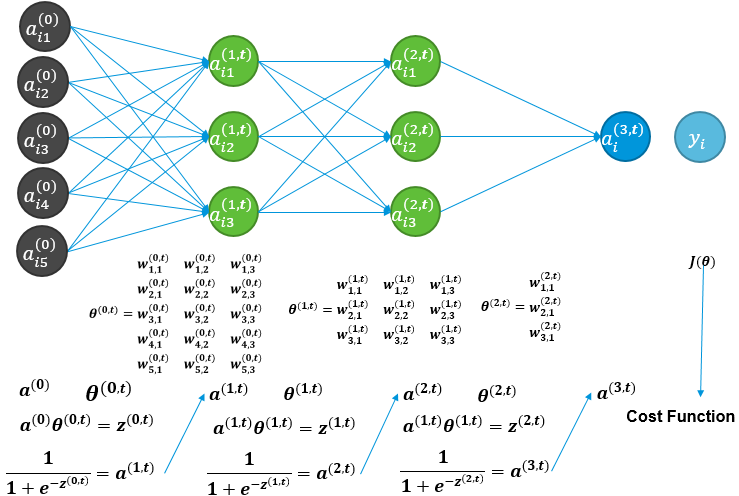

In [5]:
import os as osvariable
#Set working directory
osvariable.chdir("C:/Users/mustafa.oguz/Desktop/Github/Machine_Learning/Machine_Learning/training")
from IPython.core.display import Image 
Image(filename='ForwardPropagation.png')

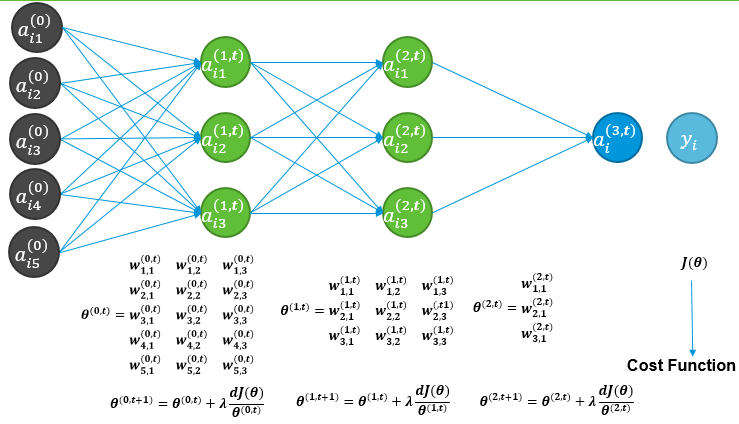

In [6]:
Image(filename='BackPropagation.png')